# Chapter 1: Learning math with code

**NOTE:** Most of this code is not explained in the chapter. It's just here in case you are curious!

## 1.1 Solving lucrative problems with math and software

### 1.1.1 Predicting financial market movements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from math import sqrt, log

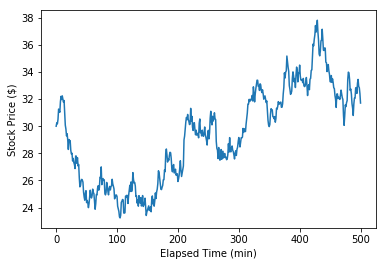

In [2]:
ys = [30]
xs = range(0,501)
np.random.seed(seed=42)
for delta in np.random.normal(0,0.5,500):
    ys.append(ys[-1] + delta)
    
# safely create the figures directory
from pathlib import Path
Path("figures").mkdir(parents=True, exist_ok=True)
    
plt.plot(ys)
plt.ylabel('Stock Price ($)')
plt.xlabel('Elapsed Time (min)')
plt.savefig('figures/1.01.svg')

In [3]:
r = stats.linregress(xs,ys)
line =  [r.slope * x + r.intercept for x in xs]

In [4]:
std = np.std([(y-y0) for y,y0 in zip(ys,line)])

In [5]:
top = [y + std for y in line]
bottom = [y - std for y in line]

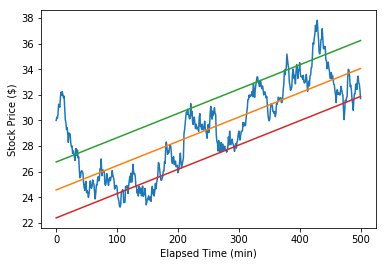

In [6]:
plt.plot(xs,ys)
plt.plot(xs,line)
plt.plot(xs,top)
plt.plot(xs,bottom)
plt.ylabel('Stock Price ($)')
plt.xlabel('Elapsed Time (min)')
plt.savefig('figures/1.02.svg')
plt.savefig('figures/1.03.svg')

### 1.1.2 Finding a good deal

In [7]:
mileages = [4.1429, 8.9173, 6.5, 6.0601, 12.3, 6.2, 2.5782, 0.9, 1.7, 13.1045, 24.7, 9.2699, 17.2, 10.0, 10.0, 2.8, 12.3773, 19.6, 7.3397, 2.1178, 12.9886, 10.9884, 16.9, 6.0, 12.9, 8.1936, 10.5, 8.0713, 1.7, 10.0, 15.6097, 17.0, 16.7, 5.6, 11.3, 19.9, 9.6, 21.6, 20.3]

In [8]:
prices = [16980.0, 15973.0, 9900.0, 15998.0, 3900.0, 12540.0, 21688.0, 17086.0, 23000.0, 8900.0, 3875.0, 10500.0, 3500.0, 26992.0, 17249.0, 19627.0, 9450.0, 3000.0, 14999.0, 24990.0, 7967.0, 7257.0, 4799.0, 13982.0, 5299.0, 14310.0, 7800.0, 12250.0, 23000.0, 14686.0, 7495.0, 4950.0, 3500.0, 11999.0, 9600.0, 1999.0, 4300.0, 3500.0, 4200.0]

In [9]:
def price(mileage): 
    return 26500 * (0.905 ** mileage)

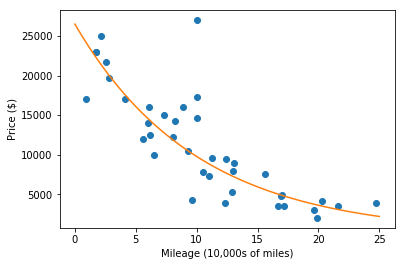

In [10]:
xs = np.linspace(0,25,100)
ys = [price(x) for x in xs]

plt.scatter(mileages,prices) 
plt.plot(xs,ys, color='C1')
plt.xlabel('Mileage (10,000s of miles)')
plt.ylabel('Price ($)')
plt.savefig('fig1.5.svg')

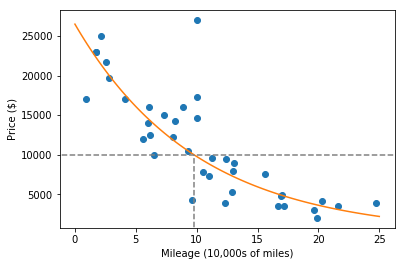

In [11]:
xs = np.linspace(0,25,100)
ys = [price(mileage) for mileage in xs]


target_mileage = log(10/26.5)/log(0.905)

plt.scatter(mileages,prices) 
plt.plot(xs,ys, color='C1')

xlim,ylim = plt.xlim(), plt.ylim()

plt.plot([-5,30],[10000,10000],color="gray",linestyle="dashed")
plt.plot([target_mileage,target_mileage],[-5000,10000],color="gray",linestyle="dashed")
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.xlabel('Mileage (10,000s of miles)')
plt.ylabel('Price ($)')
plt.savefig('fig1.6.svg')

In [12]:
0.905 ** 5

0.6070757653156251

### 1.1.3 Building 3D graphics and animations

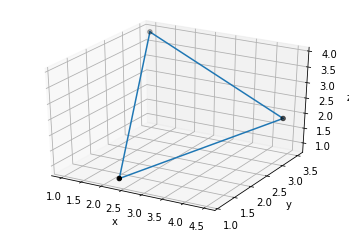

<Figure size 432x288 with 0 Axes>

In [13]:
import sys
sys.path.append('../Chapter 03')
from draw3d import *

triangle = [(2.3,1.1,0.9), (4.5,3.3,2.0), (1.0,3.5,3.9)]

draw3d(
    Polygon3D(*triangle),
    Points3D(*triangle),
    axes=False,
    origin=False
)
plt.savefig('figures/1.08.svg')